# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Подключим библиотеку pandas для работы с данными:

In [1]:
import pandas as pd

Загрузим файл с данными в таблицу df

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем на экран первые 10 строк этой таблицы:

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем общую информацию:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Так как таблица очень широкая (22 столбца) то она не помещается на экран целиком, исправим это изменив опцию вывода таблиц pandas:

In [5]:
pd.set_option('display.max_columns', None)

### Вывод

Таблица нами загружена, в соответствии с прилагаемой документацией она содержит следующие данные:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

После применения метода info сразу бросается в глаза то, что столбец is_apartment, тип которого должен быть bool, почему-то загрузился с типом object, возможно в нем содержится что-то лишнее.

Кроме того присутствует большое количество пропущенной информации, как категориального так и количественного типа, решение о том что с ней делать будет принято на следующем шаге анализа данных.

### Шаг 2. Предобработка данных

#### Наименования столбцов

В первую очередь проверим наименования столбцов:

In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия столбцов в порядке

#### Минимальные и максимальные значения в столбцах

Выведем минимальные и максимальные значения каждого столбца, это поможет нам проверить содержимое столбцов на неверные значения:

In [7]:
pd.concat([df.min(), df.max()], axis=1)

,0,1
total_images,0,50
last_price,12190,7.63e+08
total_area,12,900
first_day_exposition,2014-11-27T00:00:00,2019-05-03T00:00:00
rooms,0,19
ceiling_height,1,100
floors_total,1,60
living_area,2,409.7
floor,1,33
is_apartment,False,True


При взгляде на таблицу странные минимальные или максимальные значения мы видим в следующих столбцах:
* rooms (количество комнат) - минимальное значение 0
* ceiling_height (высота потолков) - минимальное значение 1 метр, а максимальное 100 метров
* living_area (жилая площадь) - минимальное значение 2 квадратных метра
* airports_nearest (расстояние до ближайшего аэропорта) - минимальное значение 0

Со столбцом ceiling_height мы будем работать на этапе анализа данных (для того чтобы не удалять выбросы из оригинального дата фрейма), остальные три проверим сейчас.

##### rooms - количество комнат

In [8]:
df['rooms'].value_counts().sort_index()

0      197
1     8047
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Всего предложений на рынке с количеством комнат 0 не так уж мало - 197. Возможно это не ошибка.

0 комнат это либо квартира студия либо квартира со свободной планировкой, проверим:

In [9]:
df.query('rooms == 0')['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

In [10]:
df.query('rooms == 0')['open_plan'].value_counts()

False    138
True      59
Name: open_plan, dtype: int64

197 квартир из которых 138 квартир студий и 59 квартир со свободной планировкой. Проверим общее количество тех и других квартир (добавим к выводу количество комнат в объявлениях)

In [11]:
df.query('studio == True')['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

In [12]:
df.query('open_plan == True')['rooms'].value_counts()

0    59
1     3
3     2
5     1
4     1
2     1
Name: rooms, dtype: int64

Среди объявлений о продаже квартир нет единого подхода как указывать количество комнат в квартирах-студиях и квартирах со свободной планировкой.

Для нашего анализа примем что в квартире-студии **1** комната, а в квартире со свободной планировкой комнат **0**.

Заменим значения в таблице:

In [13]:
df.loc[df['studio'] == True, 'rooms'] = 1
df.loc[df['open_plan'] == True, 'rooms'] = 0

Количество комнат по всем объявлениям:

In [14]:
df['rooms'].value_counts().sort_index()

0       67
1     8182
2     7939
3     5812
4     1179
5      325
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Всего в таблице осталось 67 квартир с количеством комнат 0 и мы знаем что все эти квартиры со свободной планировкой.

##### living_area — жилая площадь в квадратных метрах 

В соответствии со строительными нормами - минимальная площадь жилого помещения не может быть менее 8 квадратных метров. Выведем на экран предложения о продаже квартир не соответствующих этой норме:

In [15]:
df.query('living_area < 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.6,5.0,6.0,1,NaN,False,False,17.0,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,1,NaN,25.0,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
19251,19,4050000.0,33.0,2018-10-15T00:00:00,1,2.5,22.0,6.5,21,NaN,False,False,18.0,NaN,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,1,NaN,24.0,2.0,22,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21943,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.5,9.0,5.4,1,NaN,False,False,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Информация похожа на ошибки ввода, исправить их, исходя из имеющихся сведений, мы не можем, ввиду небольшого количества подобных объявлений - удалим их из таблицы:

In [16]:
df = df.drop(df[df['living_area'] < 8].index)

##### airports_nearest — расстояние до ближайшего аэропорта в метрах  

Проверим количество объявлений в которых указано что расстояние до ближайшего аэропрта 0 метров:

In [17]:
df['airports_nearest'].value_counts().sort_index()

0.0        1
6450.0     2
6914.0     1
6949.0     1
6989.0     6
          ..
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, Length: 8274, dtype: int64

Одна позиция, выведем ее на экран:

In [18]:
df.query('cityCenters_nearest == 22801.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Скорее всего значение не было заполнено, заменим его на NaN (для единообразия):

Замена 0 на '':

In [19]:
df['airports_nearest'] = df['airports_nearest'].replace(0, '')

После замены тип столбца airports_nearest стал object:

In [20]:
df['airports_nearest'].dtypes

dtype('O')

Вернем его в числовой:

In [21]:
df['airports_nearest'] = pd.to_numeric(df['airports_nearest'], errors='coerce')

#### Работа с пропусками данных

Сочетанием методов isnull и sum выясним количество пропущенных данных в столбцах:

In [22]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9192
floors_total               86
living_area              1903
floor                       0
is_apartment            20916
studio                      0
open_plan                   0
kitchen_area             2276
balcony                 11513
locality_name              49
airports_nearest         5542
cityCenters_nearest      5518
parks_around3000         5517
parks_nearest           15617
ponds_around3000         5517
ponds_nearest           14584
days_exposition          3181
dtype: int64

Перечень столбцов в которых мы будем работать с пропусками данных:

* ceiling_height
* floors_total
* living_area
* is_apartment
* kitchen_area
* balcony
* locality_name
* parks_around3000
* ponds_around3000

В столбце days_exposition пропуск означает что объявление еще не стяно с публикации, столбцы с рассоянием до какого либо объекта (airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest) заполнить приемлимыми данными без знания местоположения объекта не получится.

##### ceiling_height
Пропуски данных в этом столбце скорее всего вызваны ошибками при вводе объявлений, заменим их медианой по населенному пункту

In [23]:
medians = df.groupby(['locality_name']).agg({'ceiling_height' : 'median'})
medians = medians.dropna()
medians

,ceiling_height
locality_name,
Бокситогорск,3.90
Волосово,2.50
Волхов,2.58
Всеволожск,2.70
Выборг,2.55
...,...
садовое товарищество Рахья,2.60
село Копорье,2.50
село Павлово,2.75


In [24]:
for element in medians.index:
    df.loc[df['locality_name'] == element, 'ceiling_height'] = df.loc[df['locality_name'] == element, 'ceiling_height'].fillna(medians.loc[element, 'ceiling_height'])

Посмотрим какие остались пропуски:

In [25]:
df.query('ceiling_height.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
110,6,3850000.0,72.30,2017-09-29T00:00:00,2,NaN,3.0,27.4,2,NaN,False,False,23.6,0.0,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
168,9,2250000.0,73.00,2018-11-14T00:00:00,3,NaN,5.0,43.4,5,NaN,False,False,8.4,NaN,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.0
986,10,1950000.0,62.00,2015-02-19T00:00:00,3,NaN,5.0,NaN,5,NaN,False,False,NaN,NaN,поселок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.00,2016-11-28T00:00:00,1,NaN,3.0,NaN,3,False,False,False,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22935,8,799000.0,47.20,2018-06-16T00:00:00,2,NaN,5.0,30.6,3,NaN,False,False,6.3,1.0,поселок Володарское,NaN,NaN,NaN,NaN,NaN,NaN,5.0
23048,7,2449000.0,53.60,2018-07-10T00:00:00,2,NaN,5.0,28.4,2,NaN,False,False,8.8,NaN,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23214,3,7990000.0,56.00,2016-05-31T00:00:00,2,NaN,6.0,NaN,5,False,False,False,NaN,0.0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,70.0
23354,18,900000.0,42.60,2018-02-26T00:00:00,2,NaN,2.0,28.0,1,NaN,False,False,9.0,NaN,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0


Пропуски остались либо в небольших населенных пунктах где мало объявлений либо для тех строк где населенный пункт не заполнен. Заполним эти пропуски медианой по всей таблице:

In [26]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

##### floors_total
Всего у нас 86 объявлений в которых не указана этажность здания. Мы не можем заполнить пропуски в этом столбце какими либо достоверными сведениями, придется удалить эти строки.

In [27]:
df = df.dropna(subset=['floors_total'])

##### living_area
Пропуски в жилой площади помещения попытаемся заполнить ориентируясь на общую площадь.

Поделим весь массив объявлений на 10 категорий общих площадей методом qcut:

In [28]:
df['area_category'] = pd.qcut(df['total_area'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Рассчитаем отношение жилой площади к нежилой для каждого объявления где это возможно:

In [29]:
df['area_coef'] = df['living_area'] / df['total_area']

Создадим группировочную таблицу в которую для каждой группы площадей запишем свой средний коэффициент:

In [30]:
area_coefs = df.groupby('area_category', as_index=False).agg({'area_coef':'mean'})
area_coefs.columns = ['area_category', 'area_coef_mean']
area_coefs

,area_category,area_coef_mean
0,1,0.563633
1,2,0.488334
2,3,0.494588
3,4,0.568360
4,5,0.569215
5,6,0.593715
6,7,0.606364
7,8,0.593890
8,9,0.587442
9,10,0.583812


Добавим сгруппированные коэффициенты в общую таблицу:

In [31]:
df = df.merge(area_coefs, on='area_category')

Рассчитаем новую жилую площадь для всех помещений:

In [32]:
df['new_living_area'] = df['total_area'] * df['area_coef_mean'].round(2)

Заполним пропуски и удалим вспомогательные столбцы:

In [33]:
df['living_area'] = df['living_area'].fillna(df['new_living_area'])
df = df.drop(['area_category', 'area_coef', 'area_coef_mean', 'new_living_area'], axis=1)

##### is_apartment
Столбец is_apartment должен содержать булевые значения, заменим пропуски на False

In [34]:
df['is_apartment'] = df['is_apartment'].fillna(False)

##### kitchen_area
Пропуски в этом столбце заполним аналогично жилой площади (по соотношению общей площади за минусом жилой к площади кухни в других квартирах.

Поделим все квартиры на категории в зависимости от площади:

In [35]:
df['area_category'] = pd.qcut(df['total_area'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Рассчитаем отношение:

In [36]:
df['kitchen_coef'] = df['kitchen_area'] / (df['total_area'] - df['living_area'])

Создадим группировочную таблицу:

In [37]:
kitchen_coefs = df.groupby('area_category', as_index=False).agg({'kitchen_coef':'mean'})
kitchen_coefs.columns = ['area_category', 'kitchen_coef_mean']
kitchen_coefs

,area_category,kitchen_coef_mean
0,1,0.490292
1,2,0.509173
2,3,0.485959
3,4,0.435279
4,5,0.431234
5,6,0.405169
6,7,0.403245
7,8,0.392258
8,9,0.390288
9,10,0.362443


Добавим сгруппированные коэффициенты в общую таблицу:

In [38]:
df = df.merge(kitchen_coefs, on='area_category')

Рассчитаем новую площадь кухни для всех помещений:

In [39]:
df['new_kitchen_area'] = ((df['total_area'] - df['living_area']) * df['kitchen_coef_mean']).round(2)

Заполним пропуски и удалим вспомогательные столбцы:

In [40]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['new_kitchen_area'])
df = df.drop(['area_category', 'kitchen_coef', 'kitchen_coef_mean', 'new_kitchen_area'], axis=1)

##### balcony
Примем, что если в столбце балконы пропущено значение значит балкона в квартире нет, заполним пропуски нулем:

In [41]:
df['balcony'] = df['balcony'].fillna(0)

##### locality_name
В связи с их небольшим количеством удалим строки с пропущеным значением в этом столбце:

In [42]:
df = df.dropna(subset=['locality_name'])

##### parks_around3000, ponds_around3000
Примем, что если в этих стобцах пропущено значение значит в округе объекта нет ни парка ни пруда:

In [43]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

#### Преобразование типов данных
Выведем на экран типы данных содержащиеся в столбцах:

In [44]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Изменим типы данных на следующие:
* first_day_exposition на дату
* last_price, floors_total, balcony, parks_around3000 и ponds_around3000 на целочисленный

Тип данных в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest придется оставить float64 из-за того что там есть пропущенные значения

##### first_day_exposition
Выведем на экран столбец для того чтобы увидеть структуру строки:

In [45]:
df['first_day_exposition']

0        2019-03-07T00:00:00
1        2015-07-24T00:00:00
2        2018-06-19T00:00:00
3        2019-01-09T00:00:00
4        2015-10-31T00:00:00
                ...         
23600    2018-03-04T00:00:00
23601    2017-08-18T00:00:00
23602    2016-05-20T00:00:00
23603    2018-03-16T00:00:00
23604    2018-07-19T00:00:00
Name: first_day_exposition, Length: 23557, dtype: object

Применим метод pandas to_datetime для перевода значений из строки в дату и время

In [46]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

##### last_price, floors_total, balcony, parks_around3000, parks_around3000
Методом astype изменим тип с float на int

In [47]:
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

После всех изменений таблицы восстановим индексы:

In [48]:
df = df.reset_index(drop=True)

### Вывод
На этапе предобработки данных мы просмотрели минимальные и максимальные значения в каждом столбце, обнаружили и исправили странные значения содержащиеся в столбцах:
* rooms
* living_area
* airports_nearest

Отработали пропущеные значения в столбцах:
* ceiling_height
* floors_total
* living_area
* is_apartment
* kitchen_area
* balcony
* locality_name
* parks_around3000
* ponds_around3000

И изменили тип данных в столбцах:
* first_day_exposition
* last_price
* floors_total
* balcony
* parks_around3000
* ponds_around3000

### Шаг 3. Посчитайте и добавьте в таблицу

Для проведения анализа данных нам необходимо на основе имеющихся данных рассчитать следующую информацию:
* цену квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры (первый, последний, другой)
* соотношение жилой и общей площади, 
* отношение площади кухни к общей площади

#### Цена квадратного метра
Цену квадратного метра найдем разделив стоимость квартиры на общую площадь

In [49]:
df['square_m_price'] = (df['last_price'] / df ['total_area']).astype(int)

#### День недели, месяц и год публикации объявления
Вычислим эту информацию специальным методом DatetimeIndex

In [50]:
df['exposition_weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

#### Категория этажа квартиры
Для определения категории этажа квартиры определим новые функции:

In [51]:
def first_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return True
    else:
        return False
    
def last_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return True
    else:
        return False
    
def other_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor != 1 and floor != floors_total:
        return True
    else:
        return False    

Применим их к таблице

In [52]:
df['first_floor'] = df.apply(first_floor, axis=1)
df['last_floor'] = df.apply(last_floor, axis=1)
df['other_floor'] = df.apply(other_floor, axis=1)

#### Cоотношения жилой площади и площади кухни к общей площади
Вычислим эти соотношения

Отношение жилой площади к общей:

In [53]:
df['living_area_coef'] = (df['living_area'] / df['total_area']).round(2)

Отношение площади кухни к общей площади (так как площадь кухни в жилую не входит то вычтем жилую площадь из общей):

In [54]:
df['kitchen_area_coef'] = (df['kitchen_area'] / (df['total_area'] - df['living_area'])).round(2)

### Вывод
Для осуществления дальнейшего анализа мы добавили новые столбцы в таблицу:
* square_m_price - цена квадратного метра
* exposition_weekday - день недели размещения объявления
* exposition_month - месяц размещения объявления
* exposition_year - год размещения объявления
* first_floor - первый этаж
* last_floor - последний этаж
* other_floor - любой другой этаж
* living_area_coef - отношение жилой площади к нежилой
* kitchen_area_coef - отношение площади кухни к нежилой площади

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 1. Параметры квартир в своде по количеству объявлений

##### Общая площадь

Вызовем метод describe для просмотра основных статистических показателей 

In [55]:
df['total_area'].describe().round(2)

count    23557.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

Распределение на графике гистограмме:

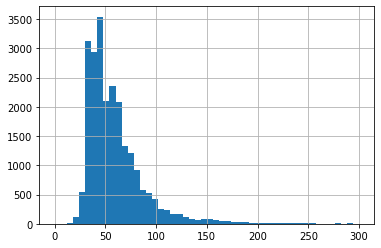

In [56]:
df['total_area'].hist(bins=50, range=(0,300))

Изучив основные статистические показатели и построив гистограмму мы можем сказать что половина всех продаваемых квартир обладает площадью от 40 до 70 м2. Квартиры площадью более 100 м2 всречаются редко, а квартиры более 200 м2 очень редко. Среди объявлений присутвует квартира плозадью 900 м2 которую мы не стали отображать на графике.

##### Цена

Метод describe для просмотра основных статистических показателей 

In [57]:
df['last_price'].describe().astype('int')

count        23557
mean       6538257
std       10906040
min          12190
25%        3400000
50%        4647000
75%        6790000
max      763000000
Name: last_price, dtype: int64

Распределение на графике гистограмме:

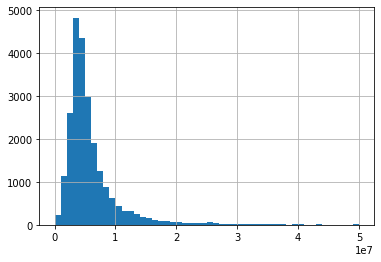

In [58]:
df['last_price'].hist(bins=50, range=(0,50000000))

Медианная и средняя цена различаются на треть - среди цен существует большой разброс, что подтверждается графиком (основная масса объявлений размещена на диапазоне от 0 до 10 млн а вправо тянется длинный хвост из дорогих предложений)

##### Число комнат

describe для просмотра основных статистических показателей 

In [59]:
df['rooms'].describe().astype('int')

count    23557
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

Распределение на гистограмме:

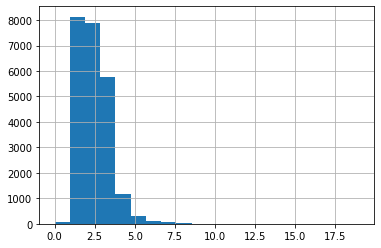

In [60]:
df['rooms'].hist(bins=20)

Не считая небольшого количества квартир со свободной планировкой (для которых мы условились оставить количество комнат 0) и небольшого хвоста из квартир больше 4-5 комнат распределение выглядит нормальным - основная масса продающихся квартир состоит из 1-3 комнат.

##### Высота потолков

describe для просмотра основных статистических показателей

In [61]:
df['ceiling_height'].describe().round(2)

count    23557.00
mean         2.73
std          1.01
min          1.00
25%          2.55
50%          2.70
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

Распределение на гистограмме:

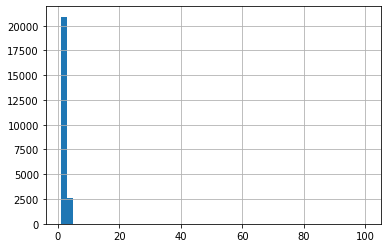

In [62]:
df['ceiling_height'].hist(bins=50)

Максимальная высота потолков среди всех объявлений 100 метров - из-за этого в правой части графика мы видим огромный выброс.

#### 2. Время продажи квартиры

describe для просмотра основных статистических показателей

In [63]:
df['days_exposition'].describe().astype('int')

count    20386
mean       180
std        219
min          1
25%         45
50%         95
75%        231
max       1580
Name: days_exposition, dtype: int64

Распределение на графике гистограмме:

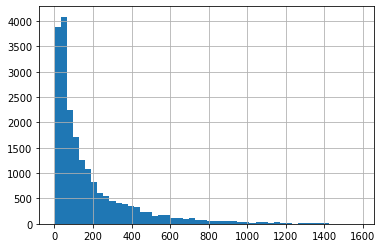

In [64]:
df['days_exposition'].hist(bins=50)

Диаграмма размаха:

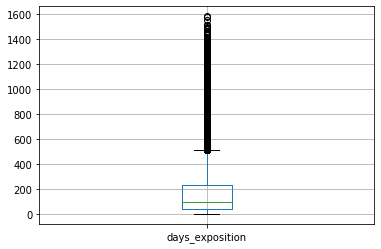

In [65]:
df.boxplot(column=['days_exposition'])

В среднем с момента размещения объявления до его снятия проходит 180 дней. Минимум времени которое объявление провело на размещении всего 1 день. А максимум 1580 - больше четырех лет.

Обычно (50% случаев) продажа занимает от 45 до 230 дней. Если объявление снимается с размещения раньше чем проходит 45 дней - значит продажа прошла быстро, если размещается больше 230 дней - очень долго. Если объявление "висит" на сайте больше 500 дней - продажа чрезвычайно долгая.

#### 3. Работа с выбросами

Часть работы с выбросами мы провели при предобработке данных:
1. Проверили нулевые значения в столбце rooms
2. Удалили из таблицы объявления с аномально низкой жилой площадью.

##### Выбросы в столбце total_area

Найдем выбросы на гистограмме

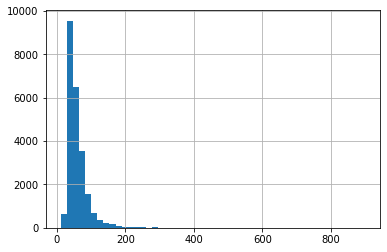

In [66]:
df['total_area'].hist(bins=50)

На части графика более 250 м2 мы видим выброс, проверим количество таких объявлений

In [67]:
len(df.query('total_area > 250'))

111

Не много, убрем их (сохранив при этом новый датафрейм для того чтобы не удалять лишнее в оригинальных данных):

In [68]:
df_processed = df.drop(df[df['total_area'] > 250].index)

Проверим распределение:

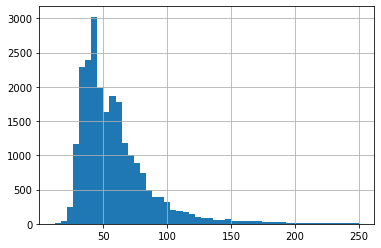

In [69]:
df_processed['total_area'].hist(bins=50)

Мы убрали сверх большие квартиры, но оставили какое то количество больших.

##### Выбросы в столбце last_price

Гистограмма для оценки распределения:

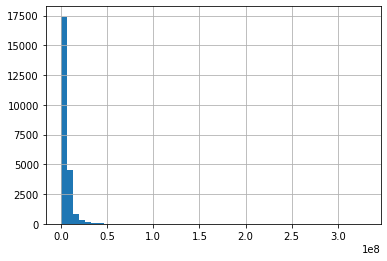

In [70]:
df_processed['last_price'].hist(bins=50)

Начиная с корзины более 50 млн график близок к нулю, прорим количество объявлений:

In [71]:
len(df_processed.query('last_price > 50000000'))

75

Уберем их:

In [72]:
df_processed = df_processed.drop(df_processed[df_processed['last_price'] > 50000000].index)

Проверим распределение:

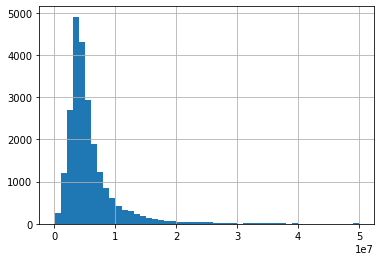

In [73]:
df_processed['last_price'].hist(bins=50)

Уже лучше. Но после 40 млн график прерывается:

In [74]:
len(df_processed.query('last_price > 40000000'))

42

Уберем и их:

In [75]:
df_processed = df_processed.drop(df_processed[df_processed['last_price'] > 40000000].index)

Проверим распределение:

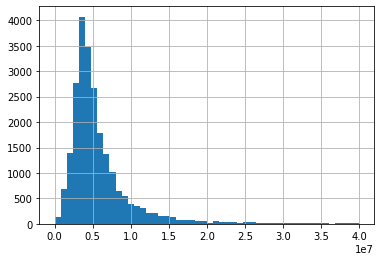

In [76]:
df_processed['last_price'].hist(bins=50)

Так как кроме города Санкт-Петербург в таблице представлены объявления из окружающих его населенных пунктов то на выбросы в минимальной цене мы будем проверять только сам город:

In [77]:
df_processed.query('last_price < 1000000 & locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,exposition_weekday,exposition_month,exposition_year,first_floor,last_floor,other_floor,living_area_coef,kitchen_area_coef
896,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,111,2,3,2019,False,True,False,0.29,0.53


Квартира расположена менее чем в 10 км от центра города но при этом цена указана всего 12190 рублей. Это невозможно, запись ошибочна и подлежит удалению:

In [78]:
df_processed = df_processed.drop(896)

Проверим распределение:

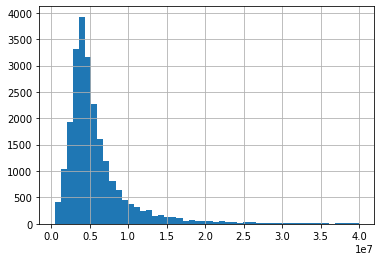

In [79]:
df_processed['last_price'].hist(bins=50)

График отодвинулся от 0. Минимальный выброс удален.

##### Выбросы в столбце ceiling_height

Выведем на экран уникальные значения из этого столбца:

In [80]:
df_processed['ceiling_height'].value_counts().sort_index()

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      9
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 187, dtype: int64

Сначала рассмотрим квартиры высотой потолков более или равной 20 метров:

In [81]:
df_processed.query('ceiling_height >= 20').sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,exposition_weekday,exposition_month,exposition_year,first_floor,last_floor,other_floor,living_area_coef,kitchen_area_coef
20717,15,6700000,92.9,2019-02-19,3,20.0,17,53.2,14,False,False,False,12.00,5,Санкт-Петербург,16295.0,15092.0,1,967.0,0,NaN,NaN,72120,1,2,2019,False,False,True,0.57,0.30
16104,12,5950000,60.0,2018-02-19,2,22.6,14,35.0,11,False,False,False,13.00,1,Санкт-Петербург,27028.0,12570.0,0,NaN,0,NaN,40.0,99166,0,2,2018,False,False,True,0.58,0.52
7636,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.50,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0,126229,2,10,2018,True,False,False,0.64,0.50
10646,0,1950000,37.0,2019-03-20,1,25.0,5,17.0,4,False,False,False,9.00,2,Луга,NaN,NaN,0,NaN,0,NaN,18.0,52702,2,3,2019,False,False,True,0.46,0.45
3335,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.20,0,Санкт-Петербург,11647.0,13581.0,0,NaN,0,NaN,NaN,94047,6,3,2017,False,False,True,0.71,0.43
18404,6,3750000,43.0,2019-03-18,2,25.0,5,29.0,3,False,False,False,6.09,0,Санкт-Петербург,27054.0,8033.0,1,540.0,0,NaN,12.0,87209,0,3,2019,False,False,True,0.67,0.44
4780,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,9.40,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0,65217,3,7,2018,False,False,True,0.58,0.41
17062,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.70,0,Кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN,74324,0,3,2019,False,True,False,0.70,0.44
16900,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.00,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0,95555,3,2,2018,False,False,True,0.67,0.47
10925,9,1700000,35.0,2015-12-04,1,25.0,5,20.0,2,False,False,False,8.00,1,поселок Новый Свет,NaN,NaN,0,NaN,0,NaN,206.0,48571,4,12,2015,False,False,True,0.57,0.53


С высокой вероятностью мы смотрим на нормальные числа высоты потолков но с ошибкой в указании десятичной части числа, исправим это:

In [82]:
df_processed.loc[df_processed['ceiling_height'] >= 20, 'ceiling_height'] = df_processed['ceiling_height'] / 10

Выведем на экран количество оставшихся квартир со странным значением высоты потолков (высота менее 2.5 метров (узаконенные строительные нормы обязывают застройщиков обеспечивать такую минимальную высоту потолков, или более 5 метров (маловероятно что такие квартиры на самом деле существуют)

In [83]:
df_processed.query('ceiling_height > 5 | ceiling_height < 2.5')['ceiling_height'].value_counts().sort_index()

1.00      1
1.20      1
1.75      1
2.00     12
2.20      1
2.25      1
2.26      1
2.30      4
2.34      1
2.40     24
2.45     15
2.46      2
2.47      3
2.48      8
2.49      1
5.30      1
5.50      1
5.80      1
8.00      3
8.30      1
10.00     1
10.30     1
13.85     3
14.00     1
Name: ceiling_height, dtype: int64

Исходя из количества предложений на рынке, квартиры с высотой потолков от 2 до 2.5 метров на самом деле существуют. Оставим их для дальнейшего анализа. Посчитаем количество квартир с высотой потолков менее 2 метров и более 5 метров

In [84]:
df_processed.query('ceiling_height > 5 | ceiling_height < 2').shape

(16, 31)

Всего 17 объявлений, это 0.07% от всего массива объявлений. Уберем их из таблицы так как это выбросы которые при дальнейшем анализе все равно пришлось бы убирать

In [85]:
df_processed = df_processed.drop(df_processed[df_processed['ceiling_height'] > 5].index)
df_processed = df_processed.drop(df_processed[df_processed['ceiling_height'] < 2].index)

Проверим распределение:

In [86]:
df_processed['ceiling_height'].describe().round(2)

count    23312.00
mean         2.70
std          0.21
min          2.00
25%          2.55
50%          2.70
75%          2.70
max          5.00
Name: ceiling_height, dtype: float64

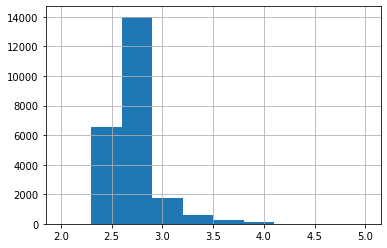

In [87]:
df_processed['ceiling_height'].hist(bins=10)

Выбросы удалены, гистограмма приобрела нормальный вид.

##### Выбросы в столбце rooms

Гистограмма для оценки распределения:

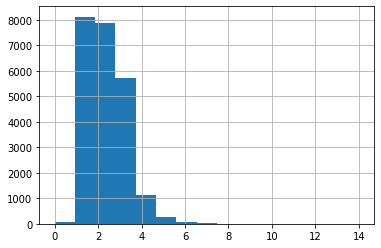

In [88]:
df_processed['rooms'].hist(bins=15)

Выброс справа, проверим количество:

In [89]:
df_processed['rooms'].value_counts().sort_index()

0       65
1     8121
2     7879
3     5722
4     1122
5      276
6       78
7       35
8        7
9        3
10       1
11       2
14       1
Name: rooms, dtype: int64

Выведем на экран объявления в которых указано больше 8 комнат:

In [90]:
df_processed.query('rooms > 8').sort_values('rooms')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,exposition_weekday,exposition_month,exposition_year,first_floor,last_floor,other_floor,living_area_coef,kitchen_area_coef
903,12,17000000,235.0,2018-07-14,9,3.00,6,136.3,3,False,False,False,35.77,0,Санкт-Петербург,24466.0,5034.0,1,346.0,0,NaN,90.0,72340,5,7,2018,False,False,True,0.58,0.36
1314,0,22250000,249.9,2019-04-23,9,3.20,5,157.0,5,False,False,False,12.40,0,Санкт-Петербург,10328.0,9987.0,2,352.0,0,NaN,NaN,89035,1,4,2019,False,True,False,0.63,0.13
2070,0,24000000,250.0,2019-04-23,9,3.20,5,160.6,3,False,False,False,11.70,0,Санкт-Петербург,10328.0,9987.0,2,352.0,0,NaN,NaN,96000,1,4,2019,False,False,True,0.64,0.13
1804,4,15500000,216.1,2016-07-04,10,3.15,5,161.4,2,False,False,False,19.80,0,Санкт-Петербург,24353.0,4921.0,1,368.0,0,NaN,11.0,71726,0,7,2016,False,False,True,0.75,0.36
75,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.30,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,NaN,95264,6,7,2018,False,True,False,0.76,0.30
982,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.90,0,Санкт-Петербург,21469.0,1015.0,1,686.0,2,66.0,813.0,170015,1,2,2017,False,False,True,0.66,0.18
2075,6,28659000,245.4,2016-03-31,14,2.70,4,168.3,2,False,False,False,25.90,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95.0,116784,3,3,2016,False,False,True,0.69,0.34


Объявления выглядят нормальными, но они портят нам однородность сведений и их всего 3. Уберем их из таблицы

In [91]:
df_processed = df_processed.drop(df_processed[df_processed['rooms'] > 8].index)

Проверим распределение после удаления выброса:

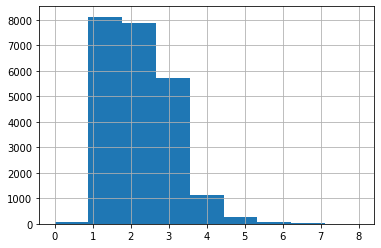

In [92]:
df_processed['rooms'].hist(bins=9)

Мы оставили некоторое количество квартир с большим количеством комнат и удалили все объявления где квартир было больше 8. Гистограмма приобрела нормальный вид.

Восстановим индексы:

In [93]:
df_processed = df_processed.reset_index(drop=True)

#### 4. Факторы влияющие на стоимость квартиры

Населенный пункт в котором расположена квартира имеет огромное влияние на ее стоимость:

In [94]:
df_processed.pivot_table(index='locality_name', values='last_price', aggfunc=['mean', 'count']).astype('int').sort_values(('mean', 'last_price'), ascending=False)

,mean,count
,last_price,last_price
locality_name,,
посёлок Репино,12166854,4
деревня Хязельки,11000000,1
деревня Бор,10397600,2
посёлок Александровская,8725000,2
Санкт-Петербург,7062399,15402
...,...,...
посёлок станции Свирь,575000,2
поселок Совхозный,517500,2


Плюс количество объявлений в городе Санкт-Петербург больше чем во всех остальных населенных пунктах вместе взятых. Поэтому при анализе факторов влияющих на стоимость квартиры мы будем рассматривать только объявления о продажах квартир в самом городе Санкт-Петербурге.

Проверим коэффициенты корреляции между ценой и остальными столбцами:

In [95]:
df_processed.query('locality_name == "Санкт-Петербург"').corr().loc['last_price'].round(2)

total_images           0.14
last_price             1.00
total_area             0.81
rooms                  0.53
ceiling_height         0.41
floors_total          -0.04
living_area            0.71
floor                  0.01
is_apartment           0.01
studio                -0.05
open_plan             -0.03
kitchen_area           0.62
balcony                0.03
airports_nearest      -0.01
cityCenters_nearest   -0.41
parks_around3000       0.20
parks_nearest          0.01
ponds_around3000       0.22
ponds_nearest         -0.13
days_exposition        0.16
square_m_price         0.64
exposition_weekday    -0.01
exposition_month      -0.00
exposition_year       -0.04
first_floor           -0.09
last_floor             0.03
other_floor            0.04
living_area_coef       0.03
kitchen_area_coef     -0.12
Name: last_price, dtype: float64

В соответствии со шкалой Чеддока сила связи зависит от величины коэффициента корреляции и может быть следующей:

    0-0.3 - очень слабая
    0.3-0.5 - слабая
    0.5-0.7 - средняя
    0.7-0.9 - высокая
    0.9-1 - очень высокая
В нашей таблице уровни связи между ценой квартиры и показателями распределены следующим образом:    

* очень высоких сил связи нет
* высокие уровни связи наблюдается с общей площадью и жилой площадью
* средние уровни связи с площадью кухни и количеством комнат
* слабые связи с расстоянием до центра города (обратная связь) и высотой потолков 
* связь с расположением этажа в доме очень слабая, практически отсутствует, так же как и связь с датой размещения 

#### 5. ТОП 10 населенных пунктов (по количеству объявлений)

Создадим сводную таблицу, отсортируем ее по возрастанию и выведем на экран первые 10 строк:

In [96]:
df_processed.pivot_table(index='locality_name', values=['square_m_price'], aggfunc=['mean', 'count']).round(2).sort_values(('count', 'square_m_price'), ascending=False).head(10)

,mean,count
,square_m_price,square_m_price
locality_name,,
Санкт-Петербург,111726.30,15402
посёлок Мурино,85642.69,519
посёлок Шушары,78550.88,439
Всеволожск,68654.01,398
Пушкин,103130.41,367
Колпино,75332.87,337
посёлок Парголово,90175.49,327
Гатчина,68745.69,307


Среди ТОП 10 населенных пунктов самая высокая стоимость квадратного метра, ожидаемо, в городе Санкт-Петербурге, минимальная в Выборге.

#### 6. Поиск центра города

Добавим в очищенную от выбросов таблицу столбец с расстоянием до центра города в километрах:

In [97]:
df_processed['cityCenters_km'] = (df_processed['cityCenters_nearest'] / 1000).round()

Построим график на котором по оси X отобразим километры от центра города а на оси Y среднюю цену квартиры

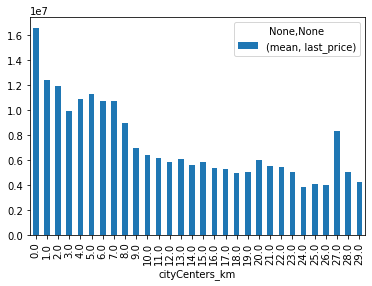

In [98]:
df_processed.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_km', values=['last_price'], aggfunc=['mean']).astype('int').plot(y=(('mean', 'last_price')), kind='bar')

Мы видим что на расстоянии 9 километров от центра города происходит резкое снижение средней цены за квартиру. Область до девятого километра и будет центральной зоной города.

#### 7. Анализ предложений в центре города

Сохраним срез объявлений из центра города в отдельную таблицу:

In [99]:
df_processed_centr = df_processed.query('locality_name == "Санкт-Петербург" & cityCenters_km < 9')

Сравним попарно различные показатели из центра города и в целом по городу:

##### total_area

In [100]:
concat_table = pd.concat([df_processed_centr['total_area'].describe(), df_processed.query('locality_name == "Санкт-Петербург"')['total_area'].describe()], axis=1).round(2)
concat_table.columns = ['centr', 'all']
concat_table

,centr,all
count,3898.00,15402.00
mean,81.84,61.89
std,38.87,30.11
min,12.00,12.00
25%,53.73,41.73
50%,74.00,54.50
75%,100.00,73.27
max,249.00,250.00


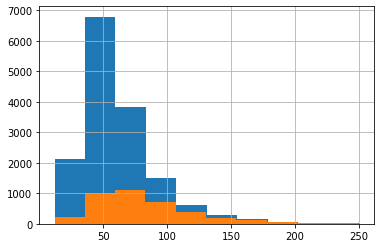

In [101]:
df_processed.query('locality_name == "Санкт-Петербург"')['total_area'].hist(bins=10)
df_processed_centr['total_area'].hist(bins=10)

Пик распределения расположен правее - значит в центре города продается больше квартир с большей площадью, среднее и медианное значение площади отличаются на 20% и 30% в пользу центра города - объявлений о продаже меньше но квартиры в них больше.

##### last_price

In [102]:
concat_table = pd.concat([df_processed_centr['last_price'].describe(), df_processed.query('locality_name == "Санкт-Петербург"')['last_price'].describe()], axis=1).round(2)
concat_table.columns = ['centr', 'all']
concat_table

,centr,all
count,3898.00,15402.00
mean,10726490.05,7062399.13
std,6783775.59,4897391.23
min,1600000.00,1190000.00
25%,6300000.00,4200000.00
50%,8600000.00,5500000.00
75%,12800000.00,7983937.50
max,40000000.00,40000000.00


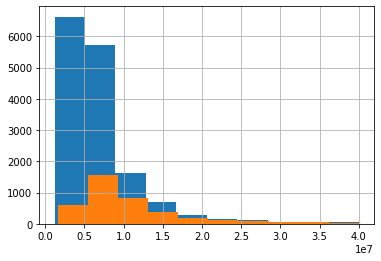

In [103]:
df_processed.query('locality_name == "Санкт-Петербург"')['last_price'].hist(bins=10)
df_processed_centr['last_price'].hist(bins=10)

Распределение на графике аналогично общей площади - пик явно смещен вправо - доля дорогих квартир выше, результаты работы метода describe это подтверждают.

##### rooms

In [104]:
concat_table = pd.concat([df_processed_centr['rooms'].describe(), df_processed.query('locality_name == "Санкт-Петербург"')['rooms'].describe()], axis=1).round(2)
concat_table.columns = ['centr', 'all']
concat_table

,centr,all
count,3898.00,15402.00
mean,2.65,2.13
std,1.24,1.05
min,0.00,0.00
25%,2.00,1.00
50%,3.00,2.00
75%,3.00,3.00
max,8.00,8.00


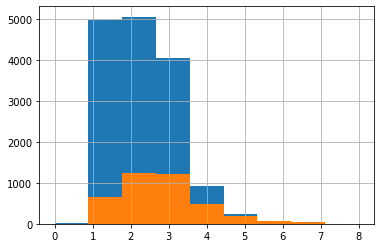

In [105]:
df_processed.query('locality_name == "Санкт-Петербург"')['rooms'].hist(bins=9)
df_processed_centr['rooms'].hist(bins=9)

Доля трехкомнатных квартир выше, но не на много. Если во всем городе вровень идут одно и двух комнтаные квартиры то в центре города это соотношение смещено в сторону трех комнатных квартир.

##### ceiling_height

In [106]:
concat_table = pd.concat([df_processed_centr['ceiling_height'].describe(), df_processed.query('locality_name == "Санкт-Петербург"')['ceiling_height'].describe()], axis=1).round(2)
concat_table.columns = ['centr', 'all']
concat_table

,centr,all
count,3898.00,15402.00
mean,2.92,2.73
std,0.32,0.23
min,2.00,2.00
25%,2.70,2.60
50%,2.76,2.70
75%,3.10,2.75
max,4.80,4.80


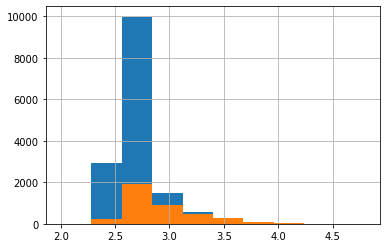

In [107]:
df_processed.query('locality_name == "Санкт-Петербург"')['ceiling_height'].hist(bins=10)
df_processed_centr['ceiling_height'].hist(bins=10)

Доля квартир с высокими потолками в центре города заметно выше. Скрее всего это связано с тем что застройка центра города осуществлялась до введения современных СНиП.

##### Коэффициенты корелляции между ценой квартиры и остальными параметрами

Выведем на экран коэффициенты корреляции:

In [108]:
concat_table = pd.concat([df_processed_centr.corr().loc['last_price'].round(2), df_processed.query('locality_name == "Санкт-Петербург"').corr().loc['last_price'].round(2)], axis=1)
concat_table.columns = ['centr', 'all']
concat_table

,centr,all
total_images,0.16,0.14
last_price,1.00,1.00
total_area,0.73,0.81
rooms,0.46,0.53
ceiling_height,0.21,0.41
floors_total,0.10,-0.04
living_area,0.62,0.71
floor,0.15,0.01
is_apartment,0.02,0.01
studio,-0.06,-0.05


Радикальных изменений нет. Заметно только сильное снижение силы связи с расстоянием до центра города, это означает что центральную зону мы определили верно.

In [109]:
len(df) - len(df_processed)

252

### Вывод
На четвертом этапе мы провели анализ данных.

Были найдены и удалены нетипичные значениz (выбросы) в столбцах total_area, last_price, ceiling_height, rooms.

Мы проверили факторы влияющие на стоимость квартиры и выяснили что высокие уровни связи наблюдаются между ценой квартиры и общей площадью либо жилой площадью, средние между ценой и площадью кухни, между ценой и количеством комнат.

Проверив среднюю стоимость квадратного метра жилья в ТОП 10 населенных пунктов (по количеству объявлений) мы выяснили что самая высокая стоимость, ожидаемо, в г Санкт-Петербург, а самая низкая в г Выборг.


Далее мы определили центральную зону города Санкт-Петербург (8 км от центра) и сравнили квартиры предлагаемые к продаже там с картиной в целом по городу. В результате анализа мы выяснили что хотя количественно квартир в центре представлено в 4 раза меньше чем во всем городе, качественно они лучше - квартиры больше по площади, потолки выше, количество комнат в среднем больше, но сами квартиры гораздо дороже, в среднем на треть.


### Шаг 5. Общий вывод

Мы провели исследование рынка жилья города Санкт-Петербург и окрестностей на примере архива объявлений за несколько лет. 

Анализ был разделен на этапы:

1 Исключение пропусков значений в таблице, вызванных невнимательностью пользователей, приведение типа данных некоторых столбцов на более подходящий для хранимой в них информации.

2 Добавили в таблицу вспомогательные столбцы для хранения дополнительной информации которую использовали на этапе анализа данных.

3 Провели иследование в результате которого подтвердили что цена квартиры зависит в большей степени от ее площади (сильная связь) и в меньшей от ее расположения (слабая связь). 

Последующее сравнение показателей, от которых зависит стоимость квартиры, в центре города и во всем остальном городе показали что несмотря на качественно лучшие квартиры в центре их стоимость зависит от тех же параметров что и во всем остальном городе (за исключением показателя расстояния от центра города).